In [1]:
import pandas as pd
from statistics import mean
import numpy as np

In [2]:
import json
from typing import List

In [3]:
path = "stats.json"

In [4]:
datas = pd.read_json(path, lines=True)

In [5]:
# metodo che calcola il numero di elementi diversi per ciascuna colonna e il numero di valori
# nulli totali del dataset
def calculateDifferentValueForColumnAndNumberOfNan(dataset, column2differentvalues, numberOfNan=0):
    # per ogni tabella del dataset
    for i in range(len(dataset)):
        columnsnames = list((dataset["columns2dataColumn"][i]))
        # per ogni colonna della tabella
        for e in range(len(columnsnames)):
            columnelems = list((dataset["columns2dataColumn"][i])[columnsnames[e]])
            columnmap = dict()
            # scorri la lista di elementi della colonna
            for l in range(len(columnelems)):
                # se il valore è nullo incrementa la variabille di nan
                if columnelems[l] == "Nan":
                    numberOfNan = numberOfNan + 1.0
                # aggiorna la mappa di termini della colonna
                columnmap.update({columnelems[l]: 1})
            # aggiorna la mappa colonna numero di elementi diversi
            table_column = dataset["id"][i] + columnsnames[e]
            column2differentvalues.update({table_column: len(columnmap.keys())})

In [6]:
totRows = len(datas)
avgRows = (datas["numRows"]).mean()
avgColumns = (datas["numColumns"]).mean()
nnan = 0
column2differentvalues = dict()
calculateDifferentValueForColumnAndNumberOfNan(datas, column2differentvalues, nnan)
avgNan = (nnan / len(datas))
#parsingtime
parsingtime = 156533921459  #ns
# indexingtime senza multithreading
indexingtimewithout = 0 
# indexingtime con multithreading
indexingtime = 75921362834   #ns
# searchingtime senza multithreading
searchingtimewithout = 0 
# searchingtime con multithreading
searchingtime = 41 #s

In [7]:
print("Numero totale di tabelle: ", totRows)
print("Numero medio di righe", avgRows)
print("Numero medio di colonne", avgColumns)
print("Numero medio di valori nulli", avgNan)
print("Tempo di parsing del file json", parsingtime)
print("indexingtime senza multithreading", indexingtime)
#print(column2differentvalues)

Numero totale di tabelle:  550271
Numero medio di righe 18.20436839302816
Numero medio di colonne 4.487583390729295
Numero medio di valori nulli 0.0


In [8]:
column2diff = pd.Series(column2differentvalues.values())

In [9]:
import matplotlib as plt
from matplotlib.pyplot import grid

print(column2diff[:])


0          13
1          10
2          12
3           8
4           3
           ..
2027075     4
2027076    30
2027077    20
2027078    38
2027079    38
Length: 2027080, dtype: int64


Plot della distribuzione del numero di righe

(0.0, 50.0)

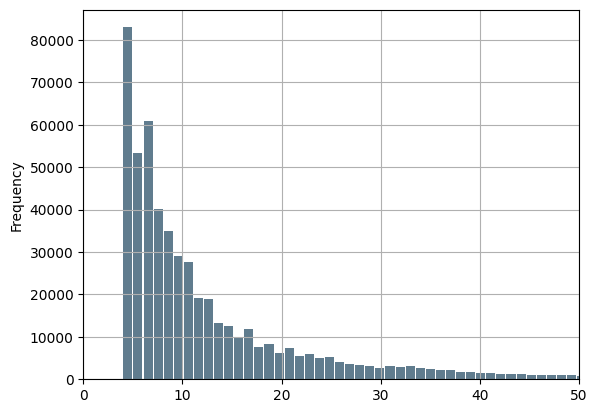

In [10]:
numrows_distr = datas["numRows"].plot.hist(bins=6000, grid=True, color='#607c8e', rwidth=0.9)
numrows_distr.set_xlim(0, 50)

Plot del numero di valori diversi per colonna

(0.0, 25.0)

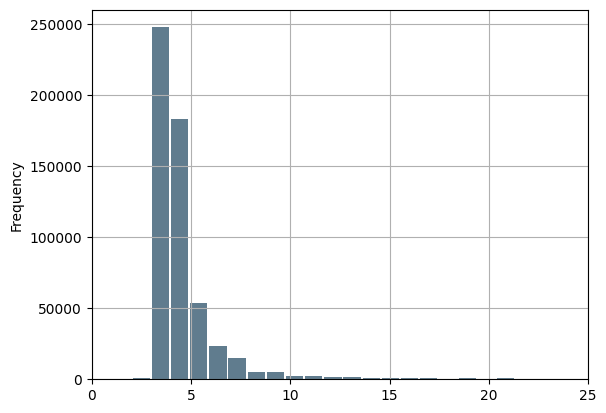

In [11]:
numcolumns_distr = datas["numColumns"].plot.hist(bins=30000, grid=True, color='#607c8e', rwidth=0.9)
numcolumns_distr.set_xlim(0, 25)

(0.0, 50.0)

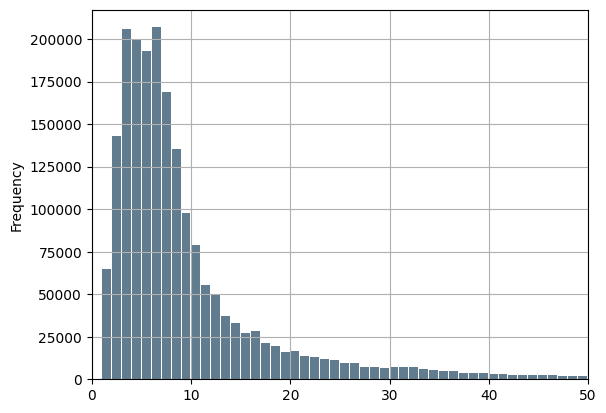

In [12]:
coldiff = column2diff.plot.hist(bins=6000, grid=True, color='#607c8e', rwidth=0.9)
coldiff.set_xlim(0, 50)

In [50]:
numrows2count = dict()
for row in datas["numRows"]:
    if numrows2count.get(row):
        numrows2count[row] = numrows2count.get(row) + 1
    else:
        numrows2count[row] = 1
print(numrows2count)
print("\n")
numrows2countsorted = sorted(numrows2count.items(), key=lambda x:x[1])
print(numrows2countsorted)

{16: 10072, 17: 11848, 11: 27696, 65: 443, 105: 144, 21: 7383, 103: 151, 100: 140, 51: 1049, 31: 3220, 35: 2338, 9: 35028, 50: 830, 7: 60894, 15: 12607, 4: 40509, 10: 29154, 8: 40078, 5: 42467, 20: 6126, 12: 19049, 24: 5018, 23: 5988, 19: 8269, 25: 5172, 6: 53420, 36: 2118, 87: 199, 54: 791, 13: 19008, 57: 582, 14: 13362, 88: 189, 41: 1558, 30: 2736, 133: 71, 60: 527, 86: 225, 61: 568, 58: 611, 26: 3987, 22: 5499, 101: 328, 33: 3045, 182: 33, 89: 186, 18: 7708, 27: 3671, 49: 910, 47: 1023, 48: 946, 69: 372, 34: 2600, 46: 1049, 29: 3177, 40: 1483, 45: 1124, 39: 1672, 28: 3341, 130: 109, 79: 264, 37: 2144, 119: 113, 92: 201, 283: 10, 150: 38, 70: 381, 59: 559, 98: 164, 38: 1728, 109: 138, 94: 181, 511: 2, 32: 2784, 52: 847, 74: 310, 474: 1, 72: 382, 43: 1218, 42: 1248, 83: 239, 113: 120, 123: 78, 102: 4912, 56: 650, 253: 15, 356: 5, 68: 424, 1599: 1, 66: 455, 129: 140, 64: 484, 143: 51, 958: 1, 702: 1, 44: 1210, 85: 213, 90: 201, 151: 100, 55: 728, 63: 439, 149: 42, 67: 391, 71: 383, 82:

In [49]:
numcolumns2count = dict()
for column in datas["numColumns"]:
    if numcolumns2count.get(column):
        numcolumns2count[column] = numcolumns2count.get(column) + 1
    else:
        numcolumns2count[column] = 1
print(numcolumns2count)
print("\n")
numcolumns2countsorted = sorted(numcolumns2count.items(), key=lambda x:x[1])
print(numcolumns2countsorted)


{7: 15159, 5: 53519, 3: 247756, 4: 182926, 16: 861, 22: 258, 13: 1727, 6: 23157, 8: 5169, 2: 1220, 11: 2070, 10: 2283, 9: 5153, 17: 971, 15: 979, 18: 418, 12: 1530, 14: 894, 66: 5, 33: 31, 21: 655, 99: 36, 100: 445, 52: 9, 27: 107, 19: 684, 120: 2, 20: 240, 25: 292, 63: 6, 26: 53, 70: 2, 24: 69, 35: 38, 23: 498, 240: 1, 220: 1, 28: 48, 72: 1, 68: 18, 40: 12, 39: 2, 32: 33, 520: 2, 28999: 1, 86: 1, 45: 1, 51: 5, 59: 2, 60: 19, 57: 21, 38: 118, 41: 3, 34: 103, 44: 7, 53: 19, 42: 23, 30: 76, 400: 16, 46: 62, 600: 30, 55: 9, 56: 9, 93: 2, 64: 4, 67: 6, 31: 94, 71: 14, 62: 4, 29: 55, 36: 42, 37: 23, 650: 1, 76: 1, 204: 1, 65: 5, 61: 3, 500: 34, 200: 1, 43: 1, 87: 3, 74: 2, 137: 7, 81: 1, 560: 1, 103: 1, 80: 2, 113: 1, 138: 2, 54: 4, 111: 1, 1000: 3, 300: 1, 58: 2, 121: 1, 73: 1, 97: 4, 420: 2, 910: 1, 660: 1, 440: 2, 360: 1, 164: 5, 140: 2, 141: 1, 390: 1, 590: 2, 104: 16, 110: 1, 513: 1, 143: 1, 127: 1, 77: 2, 102: 1, 47: 1, 163: 1, 291: 1, 115: 1, 98: 1, 83: 2, 105: 26, 48: 1, 78: 1, 49: 